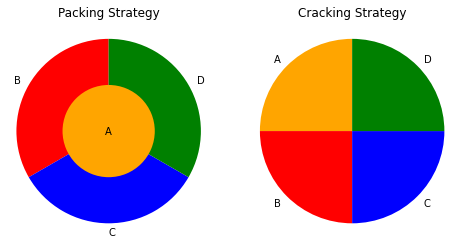

In [21]:
import matplotlib.pyplot as plt

# Define the data for the first pie chart
labels1 = ['B', 'C', 'D']
sizes1 = [33, 33, 33]
colors1 = ['red', 'blue', 'green']

# Define the data for the second pie chart
labels2 = ['A']
sizes2 = [100]
colors2 = ['orange']

# Set up the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Create the first pie chart
ax1.pie(sizes1, labels=labels1, colors=colors1, startangle=90)

# Create the second pie chart
ax1.pie(sizes2, colors=colors2, radius=0.5, startangle=90)

# Add a central label to the second pie chart
ax1.text(0, 0, 'A', ha='center', va='center', fontsize=10)


labels3 = labels2 + labels1
sizes3 = [25,25,25,25]
colors3 = colors2 + colors1

# Create the first pie chart
ax2.pie(sizes3, labels=labels3, colors=colors3, startangle=90)

# Set the aspect ratio to be equal
ax1.axis('equal')
ax2.axis('equal')

# Add titles
ax1.set_title('Packing Strategy')
ax2.set_title('Cracking Strategy')

# Show the plot
plt.show()


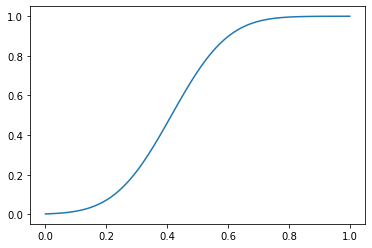

In [7]:
import matplotlib.pyplot as plt
t = 100
X = [i/t for i in range(t+1)]
Y = [f(x) for x in X]
plt.plot(X,Y)

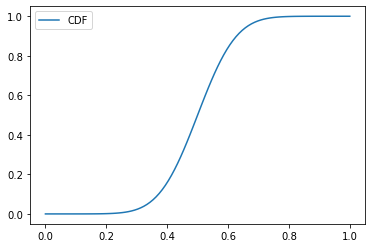

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

a = 6.826
b = -2.827
a = 10
b = -5
#Cdf function
def f(x):
    return stats.norm.cdf(a*x+b)

# Generate x values
x = np.linspace(0, 1, 100)


# Plot the functions on the same axes
plt.plot(x, f(x), label='CDF')


# Add legend
plt.legend()

# Display the plot
plt.show()

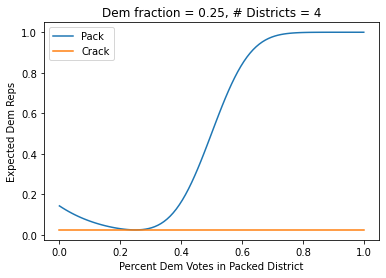

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


a = 10
b = -5
#Cdf function
def f(x):
    return stats.norm.cdf(a*x+b)

n = 4
M = 1
def g(x):
    return f(x) + (n-1)*f((M-x)/(n-1))
def h(x):
    return 0*x + n*f(M/n)

# Generate x values
x = np.linspace(0, 1, 100)

# Plot the functions on the same axes
plt.plot(x, g(x), label='Pack')
plt.plot(x, h(x), label='Crack')
#plt.plot(x, maxgh(x), label='Function 2')

# Set axis labels and title
plt.xlabel('Percent Dem Votes in Packed District')
plt.ylabel('Expected Dem Reps')
plt.title(f'Dem fraction = {M/n}, # Districts = {n}')

# Add legend
plt.legend()

# Display the plot
plt.show()

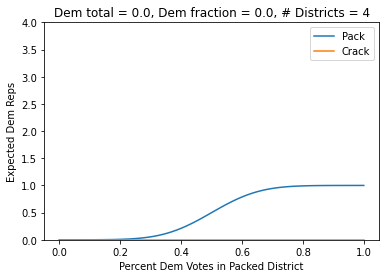

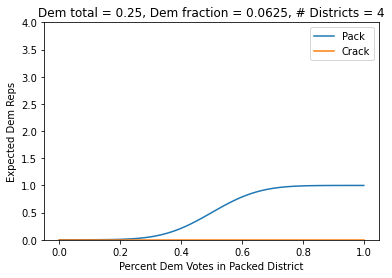

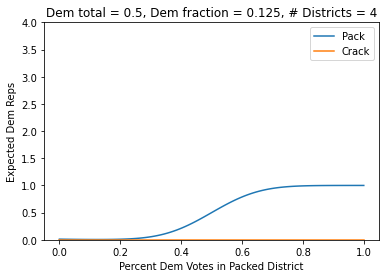

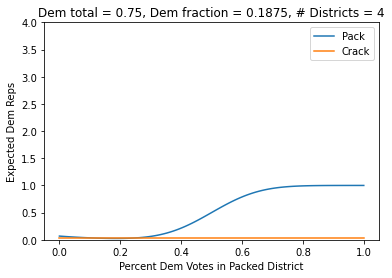

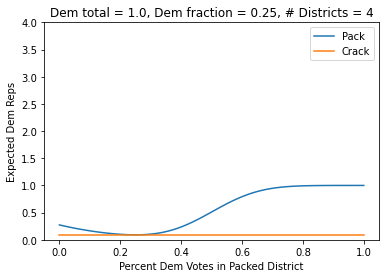

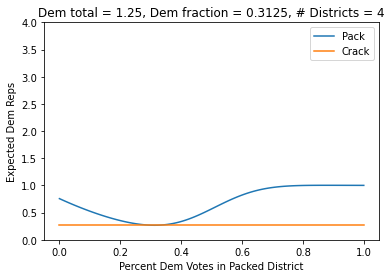

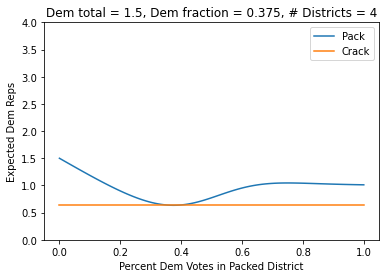

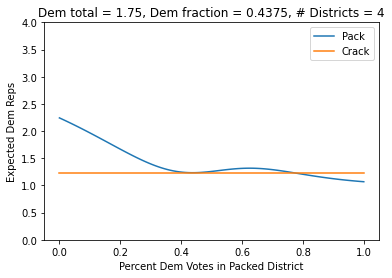

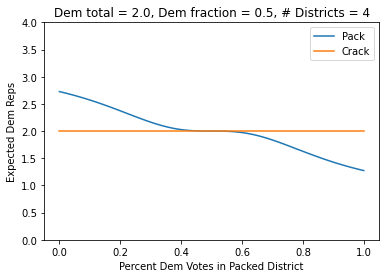

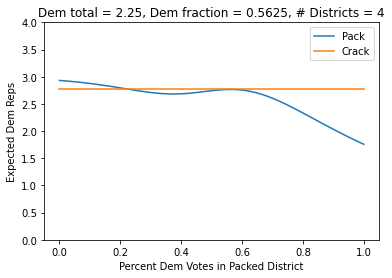

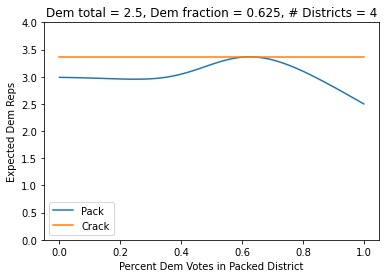

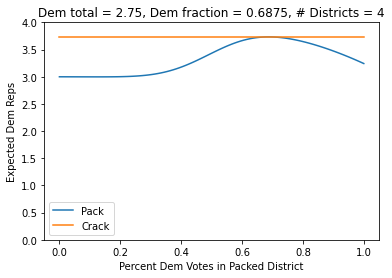

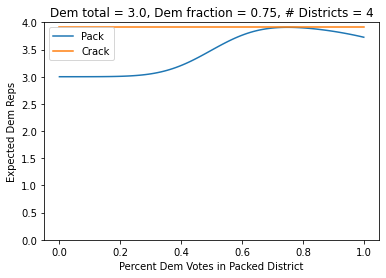

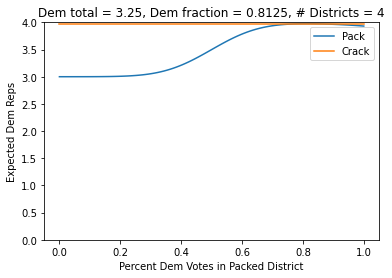

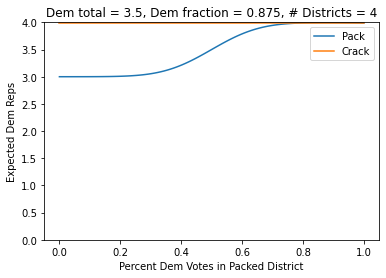

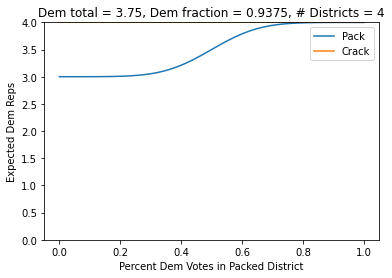

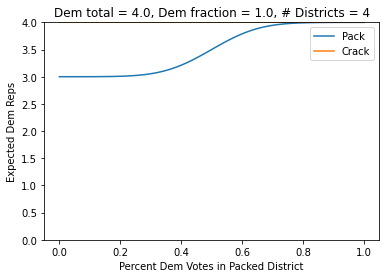

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


a = 8
b = -4
#Cdf function
def f(x):
    return stats.norm.cdf(a*x+b)

n = 4
# Loop through values of M from 0 to n at an interval of 0.25
for M in np.arange(0, n+0.25, 0.25):
    def g(x):
        return f(x) + (n-1)*f((M-x)/(n-1))
    def h(x):
        return 0*x + n*f(M/n)

    # Generate x values
    x = np.linspace(0, 1, 100)

    # Plot the functions on the same axes
    plt.plot(x, g(x), label='Pack')
    plt.plot(x, h(x), label='Crack')

    # Set axis labels and title
    plt.xlabel('Percent Dem Votes in Packed District')
    plt.ylabel('Expected Dem Reps')
    plt.title(f'Dem total = {M}, Dem fraction = {M/n}, # Districts = {n}')

    # Add legend
    plt.legend()
    
    # Set y-axis range
    plt.ylim(0, n)
    
    # Display the plot
    plt.show()


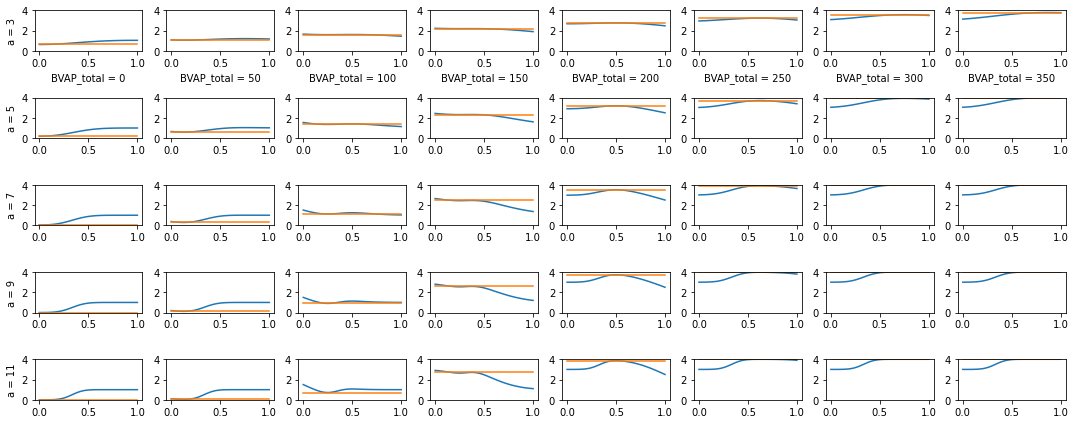

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

a_values = np.arange(3, 12, 2)
n = 4 # number of districts

# let's assume there are 100 voters in each district, and all the population is voting population
# Thus, if n=4, then there are 400 voters.


bvap_totals = np.arange(0, n*100, 50) 

# x is the fraction of bvap in district A

fig, axs = plt.subplots(nrows=len(a_values), ncols=len(bvap_totals), figsize=(15, 15))

for i, a in enumerate(a_values):
    for j, bvap_total in enumerate(bvap_totals):
        def f(x):
            b = -a/3
            return stats.norm.cdf(a * x + b) # define the probability of electing a representative
        
        def expectation_packing(x):
            # x = bvap/vap in district A
            # total voters = 100*n
            # total voters not in district A = 100*(n-1)
            # total black voters not in district A = bvap_total - x*100
            # total black voters in district B = (bvap_total - x*100)/(n-1)
            bvap_in_B = (bvap_total - x*100)/(n-1)
            
            # ratio in district B is bvap_in_B/100
            
            return f(x) + (n - 1) * f(bvap_in_B/100)
        
        def expectation_cracking(x):
            # Each district gets the same number of black voters
            bvap_in_each_district = bvap_total/n
            return 0 * x + n * f(bvap_in_each_district/100)

        x = np.linspace(0, 1, 100)

        axs[i, j].plot(x, expectation_packing(x), label='Pack')
        axs[i, j].plot(x, expectation_cracking(x), label='Crack')

        #axs[i, j].set_xlabel('Percent Dem Votes in Packed District')
        #axs[i, j].set_ylabel('Expected Dem Reps')
        #axs[i, j].set_title(f'Dem total = {M}, Dem fraction = {M/n}, # Districts = {n}, a = {a}')

        #axs[i, j].legend()
        axs[i, j].set_ylim(0, n)
        


# Add row labels
for i, a in enumerate(a_values):
    axs[i, 0].set_ylabel(f'a = {a}')
    
    # Add column labels
for j, bvap_total in enumerate(bvap_totals):
    axs[0, j].set_xlabel(f'BVAP_total = {bvap_total}')

plt.tight_layout()
plt.show()


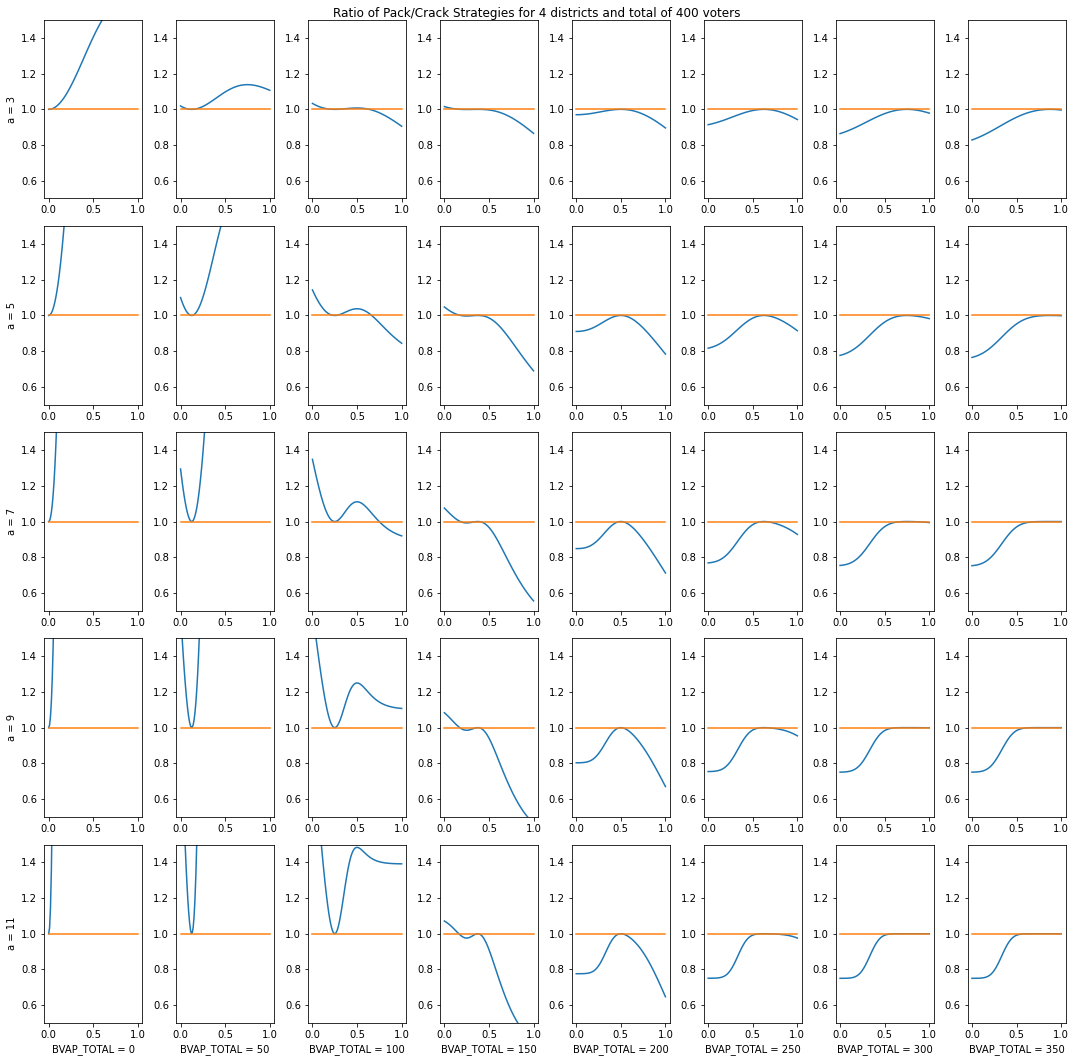

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

a_values = np.arange(3, 12, 2)
n = 4 # number of districts

# let's assume there are 100 voters in each district, and all the population is voting population
# Thus, if n=4, then there are 400 voters.


bvap_totals = np.arange(0, n*100, 50) 

D = 0.2 # total range of values

# Generate (n-1) equally spaced points between -D and D
Delta = np.linspace(-D, D, n-1)

# Subtract the mean value to make the points average to 0
Delta = Delta - np.mean(Delta)



fig, axs = plt.subplots(nrows=len(a_values), ncols=len(bvap_totals), figsize=(15, 15))

for i, a in enumerate(a_values):
    for j, bvap_total in enumerate(bvap_totals):
        def f(x):
            b = -a/3
            return stats.norm.cdf(a * x + b) # define the probability of electing a representative
        
        def expectation_packing(x):
            # x = bvap/vap in district A
            # total voters = 100*n
            # total voters not in district A = 100*(n-1)
            # total black voters not in district A = bvap_total - x*100
            # total black voters in district B = (bvap_total - x*100)/(n-1)
            bvap_in_B = (bvap_total - x*100)/(n-1)
            
            # ratio in district B is bvap_in_B/100
            
            return f(x) + (n - 1) * f(bvap_in_B/100)
        
        def expectation_cracking(x):
            # Each district gets the same number of black voters
            bvap_in_each_district = bvap_total/n
            return 0 * x + n * f(bvap_in_each_district/100)

        x = np.linspace(0, 1, 100)
        
        def r(x):
            return expectation_packing(x)/expectation_cracking(x)

        x = np.linspace(0, 1, 100)
        Y = [1 for i in x]
        axs[i, j].plot(x, r(x), label='Pack/crack')
        axs[i, j].plot(x, Y, label='1')
   

        #axs[i, j].set_xlabel('Percent Dem Votes in Packed District')
        #axs[i, j].set_ylabel('Expected Dem Reps')
        #axs[i, j].set_title(f'Dem total = {M}, Dem fraction = {M/n}, # Districts = {n}, a = {a}')

        #axs[i, j].legend()
        axs[i, j].set_ylim(0.5, 1.5)
        


# Add row labels
for i, a in enumerate(a_values):
    axs[i, 0].set_ylabel(f'a = {a}')
    
    # Add column labels
for j, bvap_total in enumerate(bvap_totals):
    axs[len(a_values)-1, j].set_xlabel(f'BVAP_TOTAL = {bvap_total}')

# Add a label to the full subplots
fig.suptitle(f'Ratio of Pack/Crack Strategies for {n} districts and total of {n*100} voters')


plt.tight_layout()
plt.show()

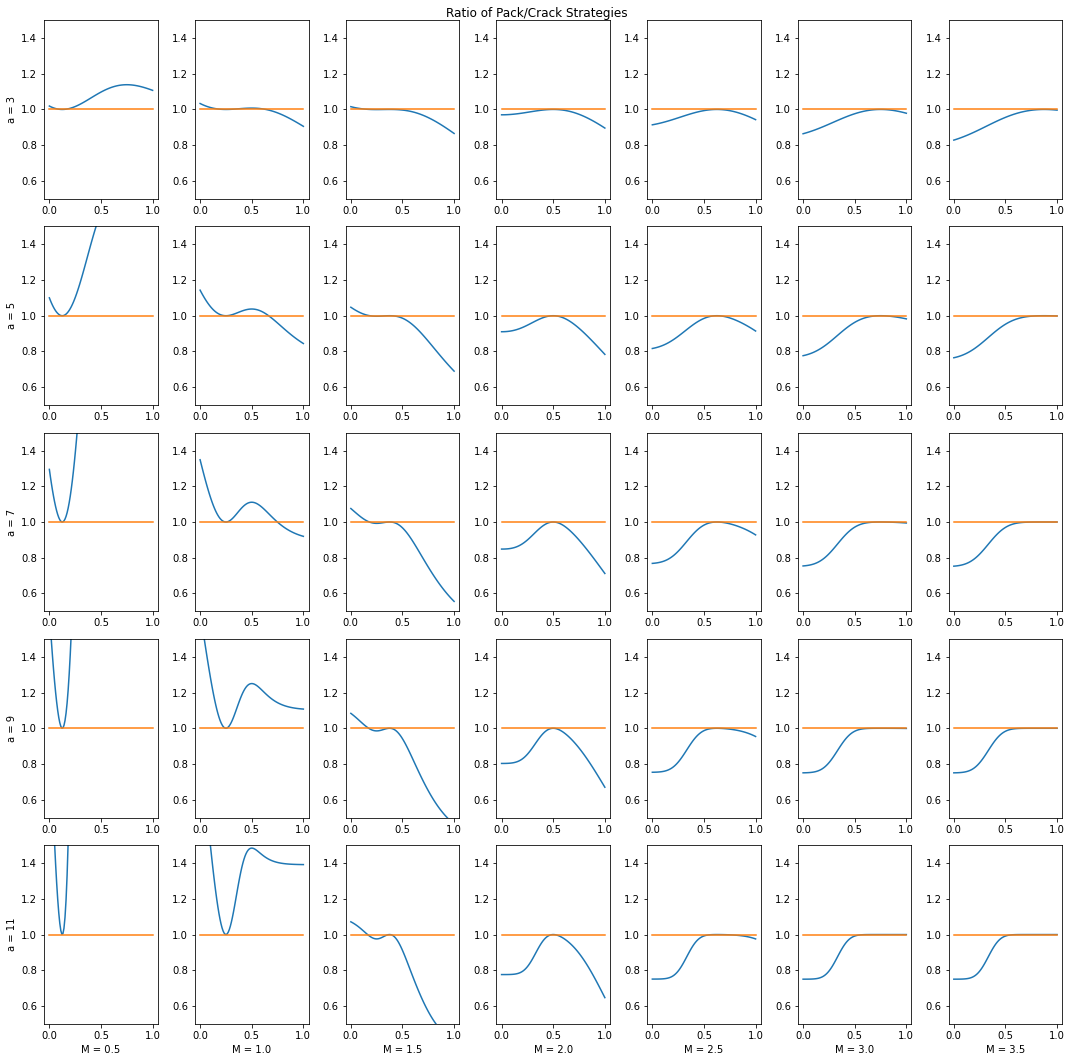

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

a_values = np.arange(3, 12, 2)
M_values = np.arange(0.5, 4, 0.5)

n = 4

fig, axs = plt.subplots(nrows=len(a_values), ncols=len(M_values), figsize=(15, 15))

for i, a in enumerate(a_values):
    for j, M in enumerate(M_values):
        def f(x):
            return stats.norm.cdf(a * x - a/3)
        
        def g(x):
            return f(x) + (n - 1) * f((M - x) / (n - 1))
        
        def h(x):
            return 0 * x + n * f(M / n)
        
        def r(x):
            return g(x)/h(x)

        x = np.linspace(0, 1, 100)

        axs[i, j].plot(x, r(x), label='Pack/crack')
        axs[i, j].plot(x, Y, label='1')
        Y = [1 for i in x]

        #axs[i, j].set_xlabel('Percent Dem Votes in Packed District')
        #axs[i, j].set_ylabel('Expected Dem Reps')
        #axs[i, j].set_title(f'Dem total = {M}, Dem fraction = {M/n}, # Districts = {n}, a = {a}')

        #axs[i, j].legend()
        axs[i, j].set_ylim(0.5, 1.5)
        


# Add row labels
for i, a in enumerate(a_values):
    axs[i, 0].set_ylabel(f'a = {a}')
    
    # Add column labels
for j, M in enumerate(M_values):
    axs[len(a_values)-1, j].set_xlabel(f'M = {M}')

# Add a label to the full subplots
fig.suptitle('Ratio of Pack/Crack Strategies')


plt.tight_layout()
plt.show()


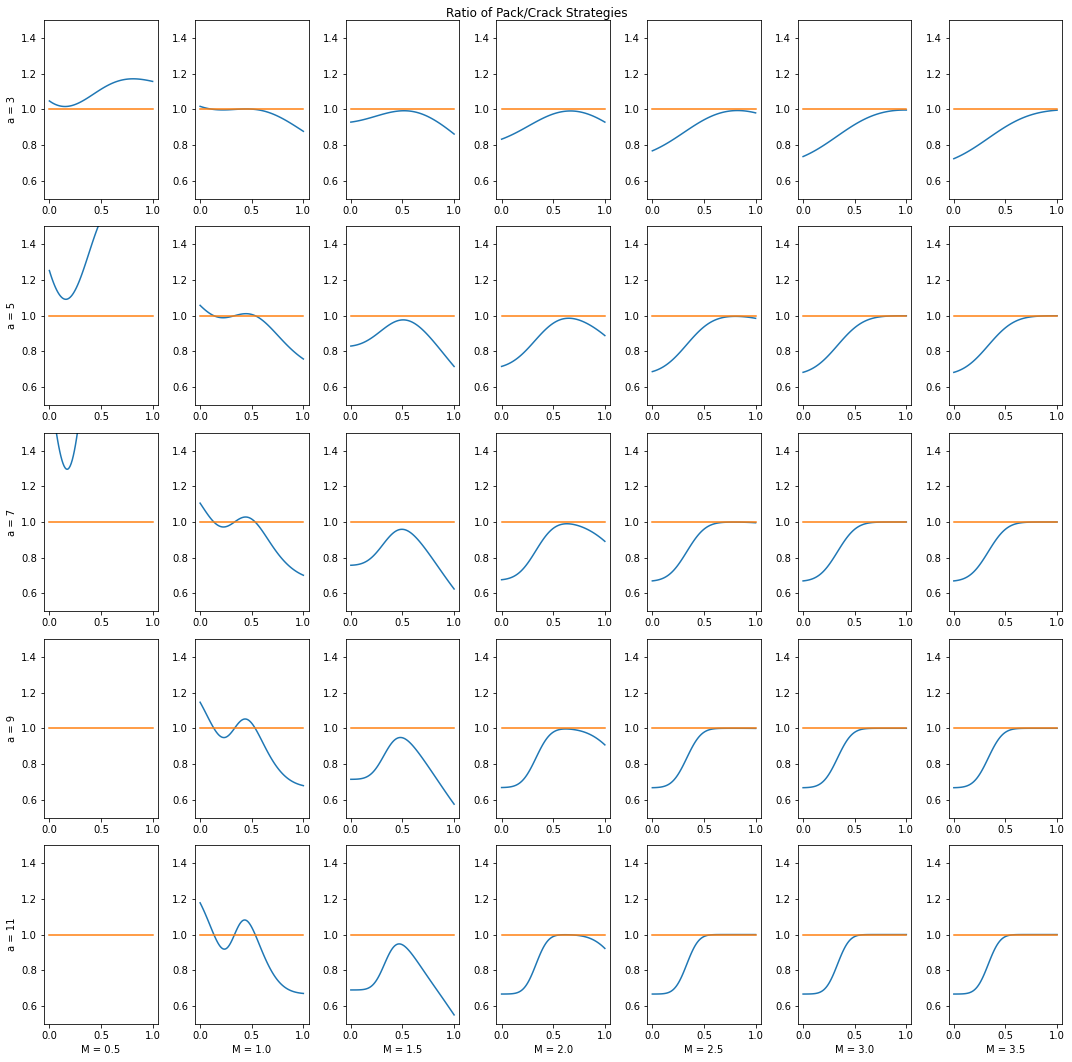

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

a_values = np.arange(3, 12, 2)
M_values = np.arange(0.5, 4, 0.5)

n = 3
D = 0.2 # total range of values

# Generate (n-1) equally spaced points between -D and D
Delta = np.linspace(-D, D, n-1)

# Subtract the mean value to make the points average to 0
Delta = Delta - np.mean(Delta)



fig, axs = plt.subplots(nrows=len(a_values), ncols=len(M_values), figsize=(15, 15))

for i, a in enumerate(a_values):
    for j, M in enumerate(M_values):
        def f(x):
            return stats.norm.cdf(a * x - a/3)
        
        def g(x):
            return f(x) + sum(f((M-x+d)/(n-1)) for d in Delta)
            #return f(x) + (n - 1) * f((M - x) / (n - 1))
        
        def h(x):
            return 0 * x + n * f(M / n)
        
        def r(x):
            return g(x)/h(x)

        x = np.linspace(0, 1, 100)
        Y = [1 for i in x]
        axs[i, j].plot(x, r(x), label='Pack/crack')
        axs[i, j].plot(x, Y, label='1')
   

        #axs[i, j].set_xlabel('Percent Dem Votes in Packed District')
        #axs[i, j].set_ylabel('Expected Dem Reps')
        #axs[i, j].set_title(f'Dem total = {M}, Dem fraction = {M/n}, # Districts = {n}, a = {a}')

        #axs[i, j].legend()
        axs[i, j].set_ylim(0.5, 1.5)
        


# Add row labels
for i, a in enumerate(a_values):
    axs[i, 0].set_ylabel(f'a = {a}')
    
    # Add column labels
for j, M in enumerate(M_values):
    axs[len(a_values)-1, j].set_xlabel(f'M = {M}')

# Add a label to the full subplots
fig.suptitle('Ratio of Pack/Crack Strategies')


plt.tight_layout()
plt.show()


In [13]:
Delta


array([-0.1       , -0.03333333,  0.03333333,  0.1       ])

In [6]:
n-1

3

In [1]:
import numpy as np

n = 5   # number of values
D = 1.0 # total range of values

# Generate (n-1) equally spaced points between -D and D
x = np.linspace(-D, D, n-1)

# Subtract the mean value to make the points average to 0
x = x - np.mean(x)

print(x)

[-1.         -0.33333333  0.33333333  1.        ]


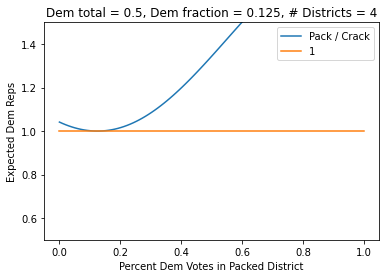

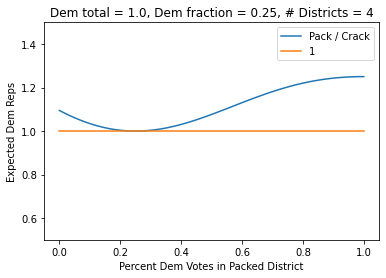

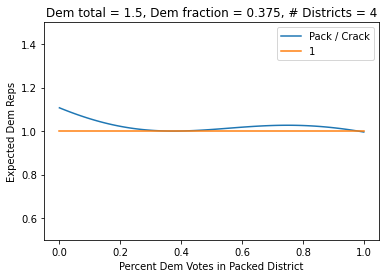

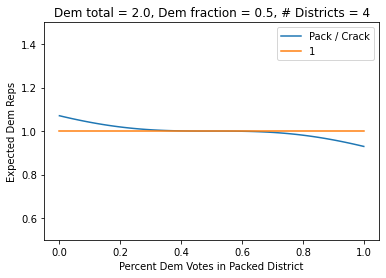

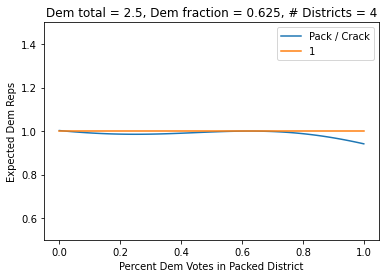

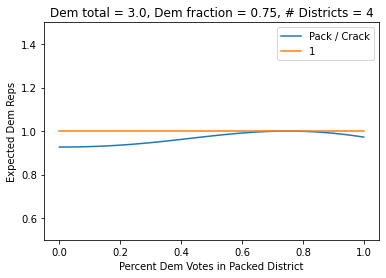

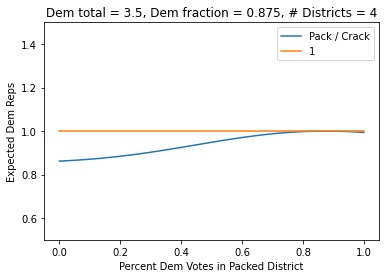

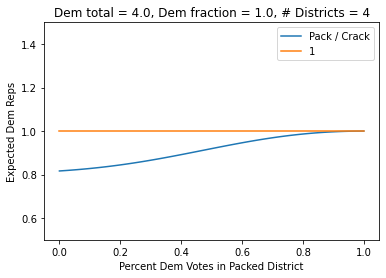

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


a = 3
#Cdf function
def f(x):
    return stats.norm.cdf(a*x-a/2)

n = 4
# Loop through values of M from 0 to n at an interval of 0.25
d = 0.5
for M in np.arange(d, n+d, d):
    def g(x):
        return f(x) + (n-1)*f((M-x)/(n-1))
    def h(x):
        return 0*x + n*f(M/n)
    def r(x):
        return g(x)/h(x)

    # Generate x values
    x = np.linspace(0, 1, 100)
    Y = [1 for i in x]

    # Plot the functions on the same axes
    plt.plot(x, r(x), label='Pack / Crack')
    plt.plot(x, Y, label='1')

    # Set axis labels and title
    plt.xlabel('Percent Dem Votes in Packed District')
    plt.ylabel('Expected Dem Reps')
    plt.title(f'Dem total = {M}, Dem fraction = {M/n}, # Districts = {n}')

    # Add legend
    plt.legend()
    
    # Set y-axis range
    plt.ylim(0.5, 1.5)
    
    # Display the plot
    plt.show()


AttributeError: 'Poly3DCollection' object has no attribute '_edgecolors2d'

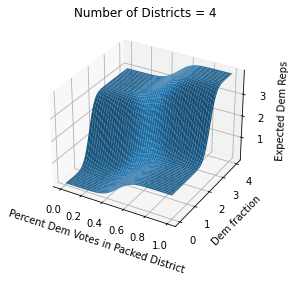

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D

a = 10
b = -5

# Cdf function
def f(x):
    return stats.norm.cdf(a * x + b)

n = 4

# Define functions g and h with M as a parameter
def g(x, M):
    return f(x) + (n - 1) * f((M - x) / (n - 1))

def h(x, M):
    return 0 * x + n * f(M / n)

# Generate x values and M values
x = np.linspace(0, 1, 100)
M = np.linspace(0, n, 50)

# Create a meshgrid for x and M
X, M = np.meshgrid(x, M)

# Evaluate g and h over the meshgrid
Z1 = g(X, M)
Z2 = h(X, M)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, M, Z1, label='Pack')
#ax.plot_surface(X, M, Z1, cmap='viridis', label='Pack', edgecolor='none')
#ax.plot_surface(X, M, Z2, cmap='plasma', label='Crack', edgecolor='none')


# Set axis labels and title
ax.set_xlabel('Percent Dem Votes in Packed District')
ax.set_ylabel('Dem fraction')
ax.set_zlabel('Expected Dem Reps')
plt.title(f'Number of Districts = {n}')

# Add legend
ax.legend()

# Show the plot
plt.show()
